# Modified van't Hoff Equation Analysis Notebook

In this notebook you will read in your concentration and melting temperature data in order to determine the enthalpy and entropy of mixing for dsDNA. This notebook assumes that the balanced chemical reaction for the denaturation of a double stranded DNA (dsDNA) molecule is:

dsDNA $\rightleftharpoons$ ssDNA$_1$ + ssDNA$_2$

**BEFORE YOU START:**
Format your data! In order to use this tool, your data **must be in CSV format** with the concentrations (**in M**) in the first column, and the inverse melting temperatures ( $1/T_m$ , **in 1/K**) in the second column.

In [ ]:
# Import needed libraries for data analysis
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from google.colab import files

# Helper Functions & Fundamental Constants
Execute this group of cells to prepare the Helper Functions for data analysis.

**You should not be modifying anything in this section!**

This section contains useful functions and constants to accomplish the goals of the notebook.

In [ ]:
# Constants
Rgas = 8.314  # J/mol*K, ideal gas constant

# Modified van't Hoff equation
def vanthoff(conc, delta_h, delta_s):
    return (-Rgas / delta_h) * np.log(conc) + (delta_s + Rgas * np.log(4)) / delta_h

# Function to load the data
def load_data(file):
    df = pd.read_csv(file, header=None, names=['x', 'y'])
    return df

# Function to perform the nonlinear fit
def fit_vanthoff(data):
    # Concentration is x, and y is the corresponding van't Hoff data (free energy, etc.)
    x_data = data['x'].values
    y_data = data['y'].values

    # Initial guesses for delta_h and delta_s
    initial_guess = [10000, 100]  # Rough initial guesses for delta_h (in J/mol) and delta_s (in J/mol*K)

    # Perform curve fitting
    popt, pcov = curve_fit(vanthoff, x_data, y_data, p0=initial_guess)

    # Extract optimized parameters and their uncertainties
    delta_h, delta_s = popt
    uncertainties = np.sqrt(np.diag(pcov))
    delta_h_err, delta_s_err = uncertainties

    return delta_h, delta_s, delta_h_err, delta_s_err

# Function to plot the data and the fit
def plot_data_with_fit(data, delta_h, delta_s):
    x_data = data['x'].values
    y_data = data['y'].values

    plt.scatter(x_data, y_data, label='Data')

    # Plot the fitted curve
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = vanthoff(x_fit, delta_h, delta_s)
    plt.plot(x_fit, y_fit, color='red', label='Fit')

    plt.xlabel('Concentration (M)')
    plt.ylabel('1/$T_m$ (1/K)')
    plt.title('Van\'t Hoff Fit')
    plt.legend()
    plt.show()


# Instructions

Execute the cells below to perform the nonlinear fitting of the modified van't Hoff equation using your concentration vs melting temperature data collected during your experiment. The final output should be a summary of the enthalpy and entropy of mixing for dsDNA.

# Import Experimental Data - CSV

Execute the cell below, select the data file you wish to analyze, and then proceed with the subsequent steps.

In [ ]:
# Step 1: Upload data file
uploaded = files.upload()

# Step 2: Retrieve the file name
file_name = list(uploaded.keys())[0]

# Step 3: Print the file name
print(f"Uploaded file name: {file_name}")

Saving Processed DNA Data - van't Hoff.csv to Processed DNA Data - van't Hoff.csv
Uploaded file name: Processed DNA Data - van't Hoff.csv


# Create DataFrame, perform a nonlinear fit of the modified van't Hoff equation, print the values of $\Delta H$ and $\Delta S$ and plot your fit

Execute the cell below in order to create a DataFrame of your experimental data and then perform a nonlinear fit of the modified van't Hoff equation:

$
\frac{1}{T_m} = \frac{-R}{\Delta H} \, \ln{C} + \frac{\Delta S + R \ln{4}}{\Delta H}
$

where $T_m$ is the melting temperature (in K), $C$ is the concentration (in M), $R$ is the ideal gas constant in J/(mol$\cdot$K), $\Delta H$ is the enthalpy of mixing, and $\Delta S$ is the entropy of mixing.

Delta H: 248533.692 J/mol ± 61467.701 J/mol
Delta S: 691.798 J/mol*K ± 199.873 J/mol*K


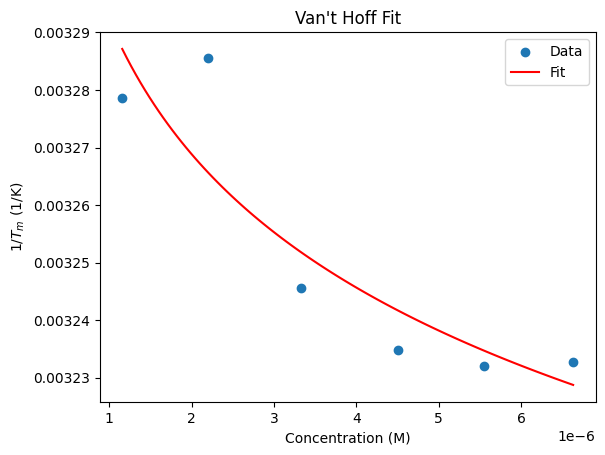

In [ ]:
df = load_data(file_name)

# Fit the data to the modified van't Hoff equation
delta_h, delta_s, delta_h_err, delta_s_err = fit_vanthoff(df)

# Print out the results with uncertainties
print(f"Delta H: {delta_h:.3f} J/mol ± {delta_h_err:.3f} J/mol")
print(f"Delta S: {delta_s:.3f} J/mol*K ± {delta_s_err:.3f} J/mol*K")

# Plot the data and the fit
plot_data_with_fit(df, delta_h, delta_s)

# Calculate the Gibbs' free energy and equilibrium constant for the denaturation of dsDNA

In this section, calculate your values of the Gibbs' free energy and equilibrium constant (at 298 K) using your values of enthalpy and entropy from the previous section

In [ ]:
# Calculate Gibbs free energy here
delta_g = delta_h - 298.15*delta_s

# Print out the result
print(f"Delta G: {delta_g:.3f} J/mol")

Delta G: 42274.213 J/mol


In [ ]:
# Calculate equilibrium constant here
keq = np.exp(-delta_g/(Rgas * 298.15))

# Print out the result
print(f"Keq: {keq:.4E}")

Keq: 3.9216E-08


# Calculate the uncertainty in $\Delta G$ and $K$

In this section, calculate the uncertainties of the Gibbs' free energy and the equilibrium constant.

In [ ]:
# calculate uncertainty in Gibbs free energy here
delta_g_err = np.abs(delta_g) * np.sqrt((delta_h_err/delta_h)**2 + (delta_s_err/delta_s)**2)

# Print out the result
print(f"Delta G err: {delta_g_err:.3f} J/mol")

Delta G err: 16077.635 J/mol


In [ ]:
# calculate uncertainty in equilibrium constant here
keq_err = keq * np.sqrt((delta_g_err/delta_g)**2)

# Print out the result
print(f"Keq err: {keq_err:.4E}")

Keq err: 1.4915E-08
